### Visualizing Predictions of Chronic Kidney Disease: A Machine Learning Approach

##### Student Name: Shreemithra Naveen, Student ID: 23895041
##### Student Name: Sai Laasya Gorantla, Student ID: 23884136




##### Importing the libraries

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier


In [44]:
#Loading the file
disease = pd.read_csv('kidney_disease.csv')

In [45]:
#Shape
print("Shape of the disease dataframe", disease.shape)

Shape of the disease dataframe (400, 26)


In [46]:
#First five rows
print(disease.head())

   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]


In [47]:
#Dropping off the column 'id'
disease = disease.drop('id', axis = 1)

In [48]:
#Renaming the columns for easy understanding the column and dataset clearly
disease.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium','potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema','aanemia', 'class']

In [49]:
print(disease['class'].unique)

<bound method Series.unique of 0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: class, Length: 400, dtype: object>


In [50]:
#Information about the dataframe
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

### Handling null values


In [51]:
disease.isna().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

It is clear that every column has null values so we need to drop 

In [52]:
#Understaning the summary stastics
disease.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


##### Converting the column named white - red blood cells and packed_cell_volume into the numerical value as it is of object type



In [53]:
#Converting the column, the errors is applied for not considering the NA values
disease[['packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']] = disease[['packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']].apply(pd.to_numeric, errors = 'coerce')

In [54]:
#As the 6-7 columns has just 1,2 or 4 missing values
disease.dropna(subset=['hypertension', 'diabetes_mellitus','coronary_artery_disease','appetite', 'peda_edema','aanemia', 'bacteria', 'pus_cell_clumps'], inplace = True)

In [55]:
numerical_columns_null = ['age','blood_pressure', 'specific_gravity', 'albumin' ,'sugar', 'blood_glucose_random' , 'blood_urea' , 'serum_creatinine', 'sodium', 'potassium' ,'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']

for feature in numerical_columns_null:
    disease[feature].fillna(disease[feature].mean(), inplace = True)

C:\Users\shree\AppData\Local\Temp\ipykernel_2888\121457441.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  disease[feature].fillna(disease[feature].mean(), inplace = True)


In [56]:
disease.isna().sum()

age                          0
blood_pressure               0
specific_gravity             0
albumin                      0
sugar                        0
red_blood_cells            151
pus_cell                    64
pus_cell_clumps              0
bacteria                     0
blood_glucose_random         0
blood_urea                   0
serum_creatinine             0
sodium                       0
potassium                    0
haemoglobin                  0
packed_cell_volume           0
white_blood_cell_count       0
red_blood_cell_count         0
hypertension                 0
diabetes_mellitus            0
coronary_artery_disease      0
appetite                     0
peda_edema                   0
aanemia                      0
class                        0
dtype: int64

In [57]:
categorical_null = ['red_blood_cells', 'pus_cell']

values = ['normal', 'abnormal']
for feature in categorical_null:
    print(disease[feature].unique(), disease[feature].isna().sum())
    disease[feature].fillna(random.choice(values), inplace=True)


[nan 'normal' 'abnormal'] 151
['normal' 'abnormal' nan] 64


C:\Users\shree\AppData\Local\Temp\ipykernel_2888\746075712.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  disease[feature].fillna(random.choice(values), inplace=True)


In [58]:
disease.isna().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [59]:
categorical = disease.select_dtypes(include = 'object')
categorical.columns 

Index(['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
       'appetite', 'peda_edema', 'aanemia', 'class'],
      dtype='object')

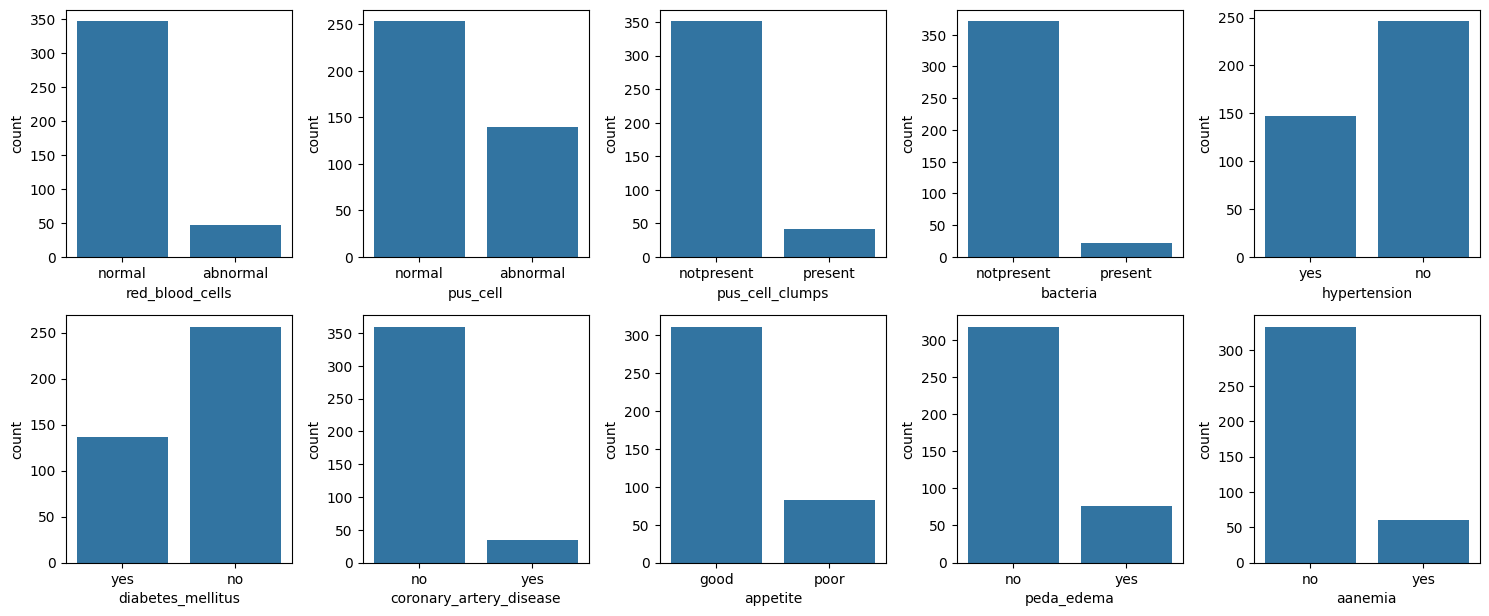

In [32]:
plt.figure(figsize=(15,15))
for i,col_name in enumerate(categorical.columns, start = 1):
    plt.subplot(5,5,i)
    sns.countplot(x = disease[col_name])
plt.tight_layout()
plt.show()

In [60]:
## Replacing the incorrect values - cleaning
print(disease['class'].unique())
# Clean 'diabetes_mellitus' column
disease['diabetes_mellitus']= disease['diabetes_mellitus'].replace(to_replace={'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'})
disease['coronary_artery_disease'] = disease['coronary_artery_disease'].replace(to_replace='\tno',value='no')
disease['class'] = disease['class'].replace(to_replace={'ckd\t': 'ckd'})

print(disease['class'].unique())

['ckd' 'ckd\t' 'notckd']
['ckd' 'notckd']


In [61]:
#Converting the class to the numerical column and also assigning binary values
print(disease['class'].unique())
disease['class'] = disease['class'].map({'ckd': 0, 'notckd': 1})
disease['class'] = pd.to_numeric(disease['class'], errors='coerce')
print(disease['class'].unique())

disease['class'].dtype


['ckd' 'notckd']
[0 1]


dtype('int64')

In [34]:
#Fetching the numerical columns
numerical_columns = disease.select_dtypes(exclude = 'object')

numerical_columns.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'class'],
      dtype='object')

<Figure size 1500x1500 with 0 Axes>

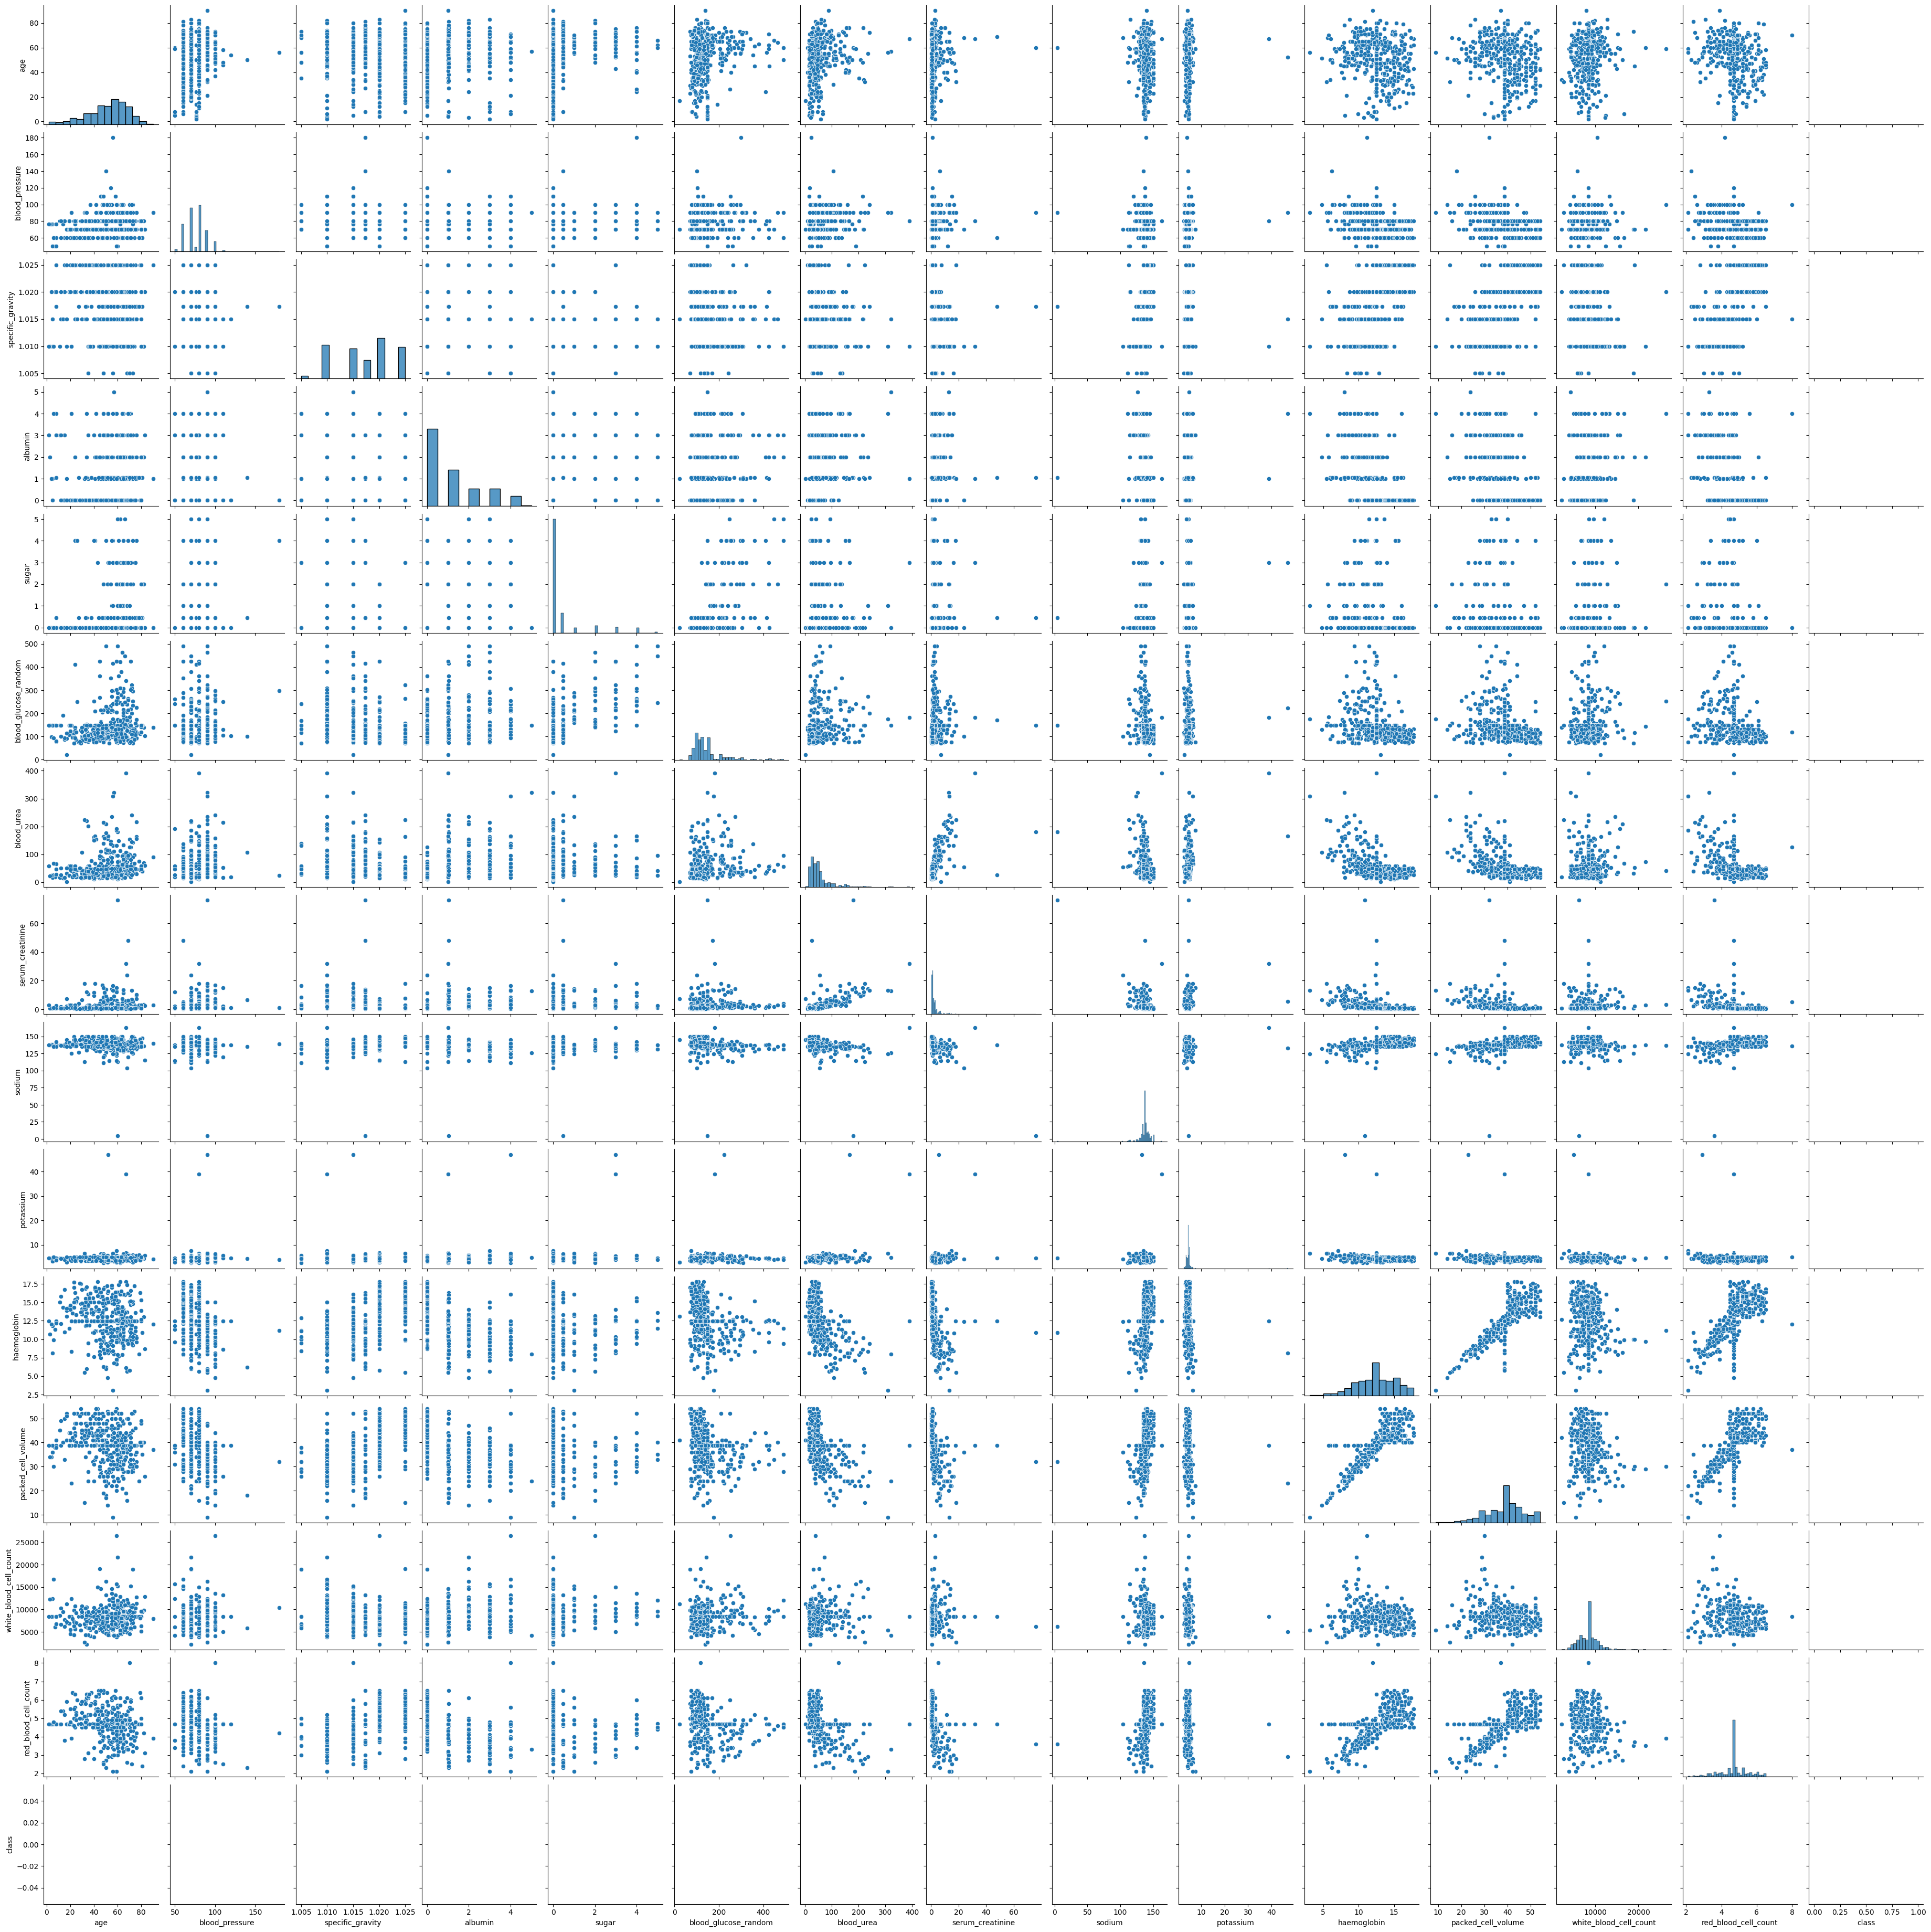

In [35]:
plt.figure(figsize=(15,15))
sns.pairplot(numerical_columns)
plt.show()

Label encoder and column values

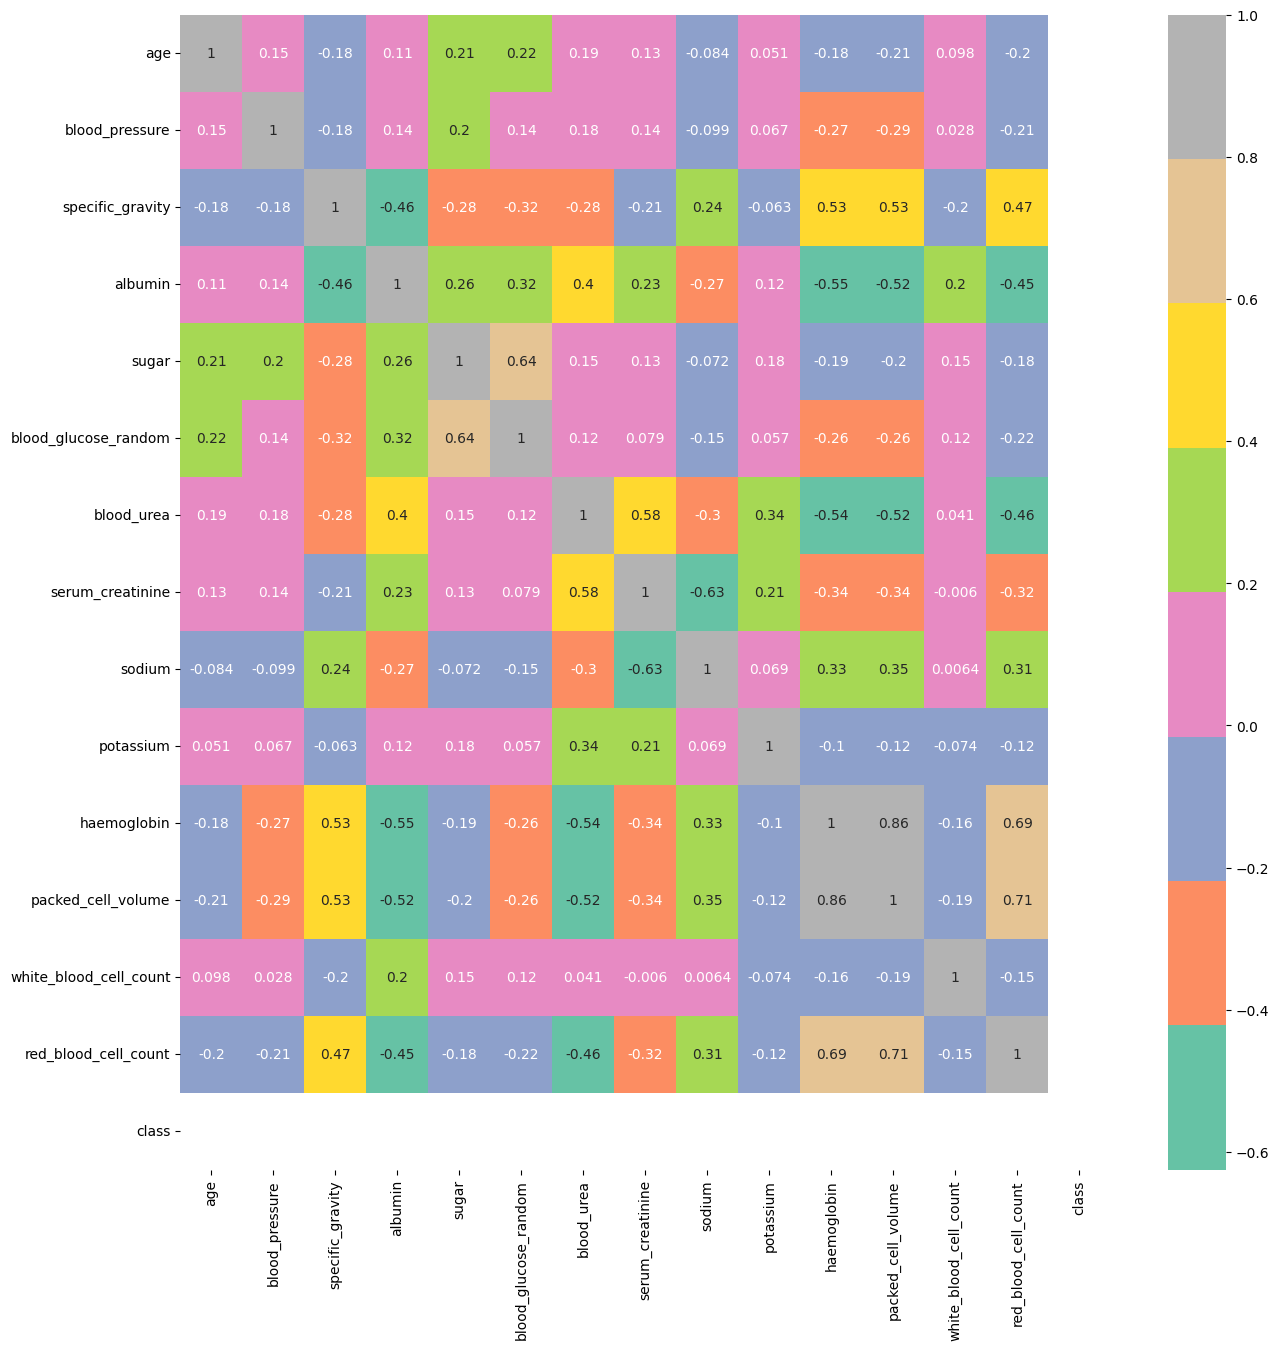

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
age,1.000000,0.151567,-0.183335,0.114997,0.208953,0.216097,0.186074,0.127036,-0.083679,0.050509,-0.178242,-0.211564,0.097890,-0.199966,NaN
blood_pressure,0.151567,1.000000,-0.175084,0.138359,0.196877,0.143508,0.179354,0.140180,-0.099311,0.067050,-0.272492,-0.288615,0.027757,-0.210332,NaN
specific_gravity,-0.183335,-0.175084,1.000000,-0.461722,-0.284779,-0.321642,-0.275691,-0.211164,0.242646,-0.062606,0.527935,0.525378,-0.204695,0.468351,NaN
albumin,0.114997,0.138359,-0.461722,1.000000,0.263845,0.321390,0.403027,0.227477,-0.270321,0.115044,-0.546278,-0.523515,0.201623,-0.450666,NaN
sugar,0.208953,0.196877,-0.284779,0.263845,1.000000,0.638066,0.149469,0.127944,-0.072252,0.181329,-0.187491,-0.198370,0.153718,-0.177596,NaN
blood_glucose_random,0.216097,0.143508,-0.321642,0.321390,0.638066,1.000000,0.123645,0.078749,-0.154028,0.056541,-0.262518,-0.260139,0.122718,-0.216730,NaN
blood_urea,0.186074,0.179354,-0.275691,0.403027,0.149469,0.123645,1.000000,0.579921,-0.304809,0.337572,-0.538915,-0.524317,0.040617,-0.463764,NaN
serum_creatinine,0.127036,0.140180,-0.211164,0.227477,0.127944,0.078749,0.579921,1.000000,-0.625096,0.205640,-0.339509,-0.339478,-0.006037,-0.320471,NaN
sodium,-0.083679,-0.099311,0.242646,-0.270321,-0.072252,-0.154028,-0.304809,-0.625096,1.000000,0.068572,0.334063,0.345784,0.006364,0.314408,NaN
potassium,0.050509,0.067050,-0.062606,0.115044,0.181329,0.056541,0.337572,0.205640,0.068572,1.000000,-0.101721,-0.124107,-0.074082,-0.122104,NaN


In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(numerical_columns.corr(), annot=True, cmap = 'Set2')
plt.show()


numerical_columns.corr()

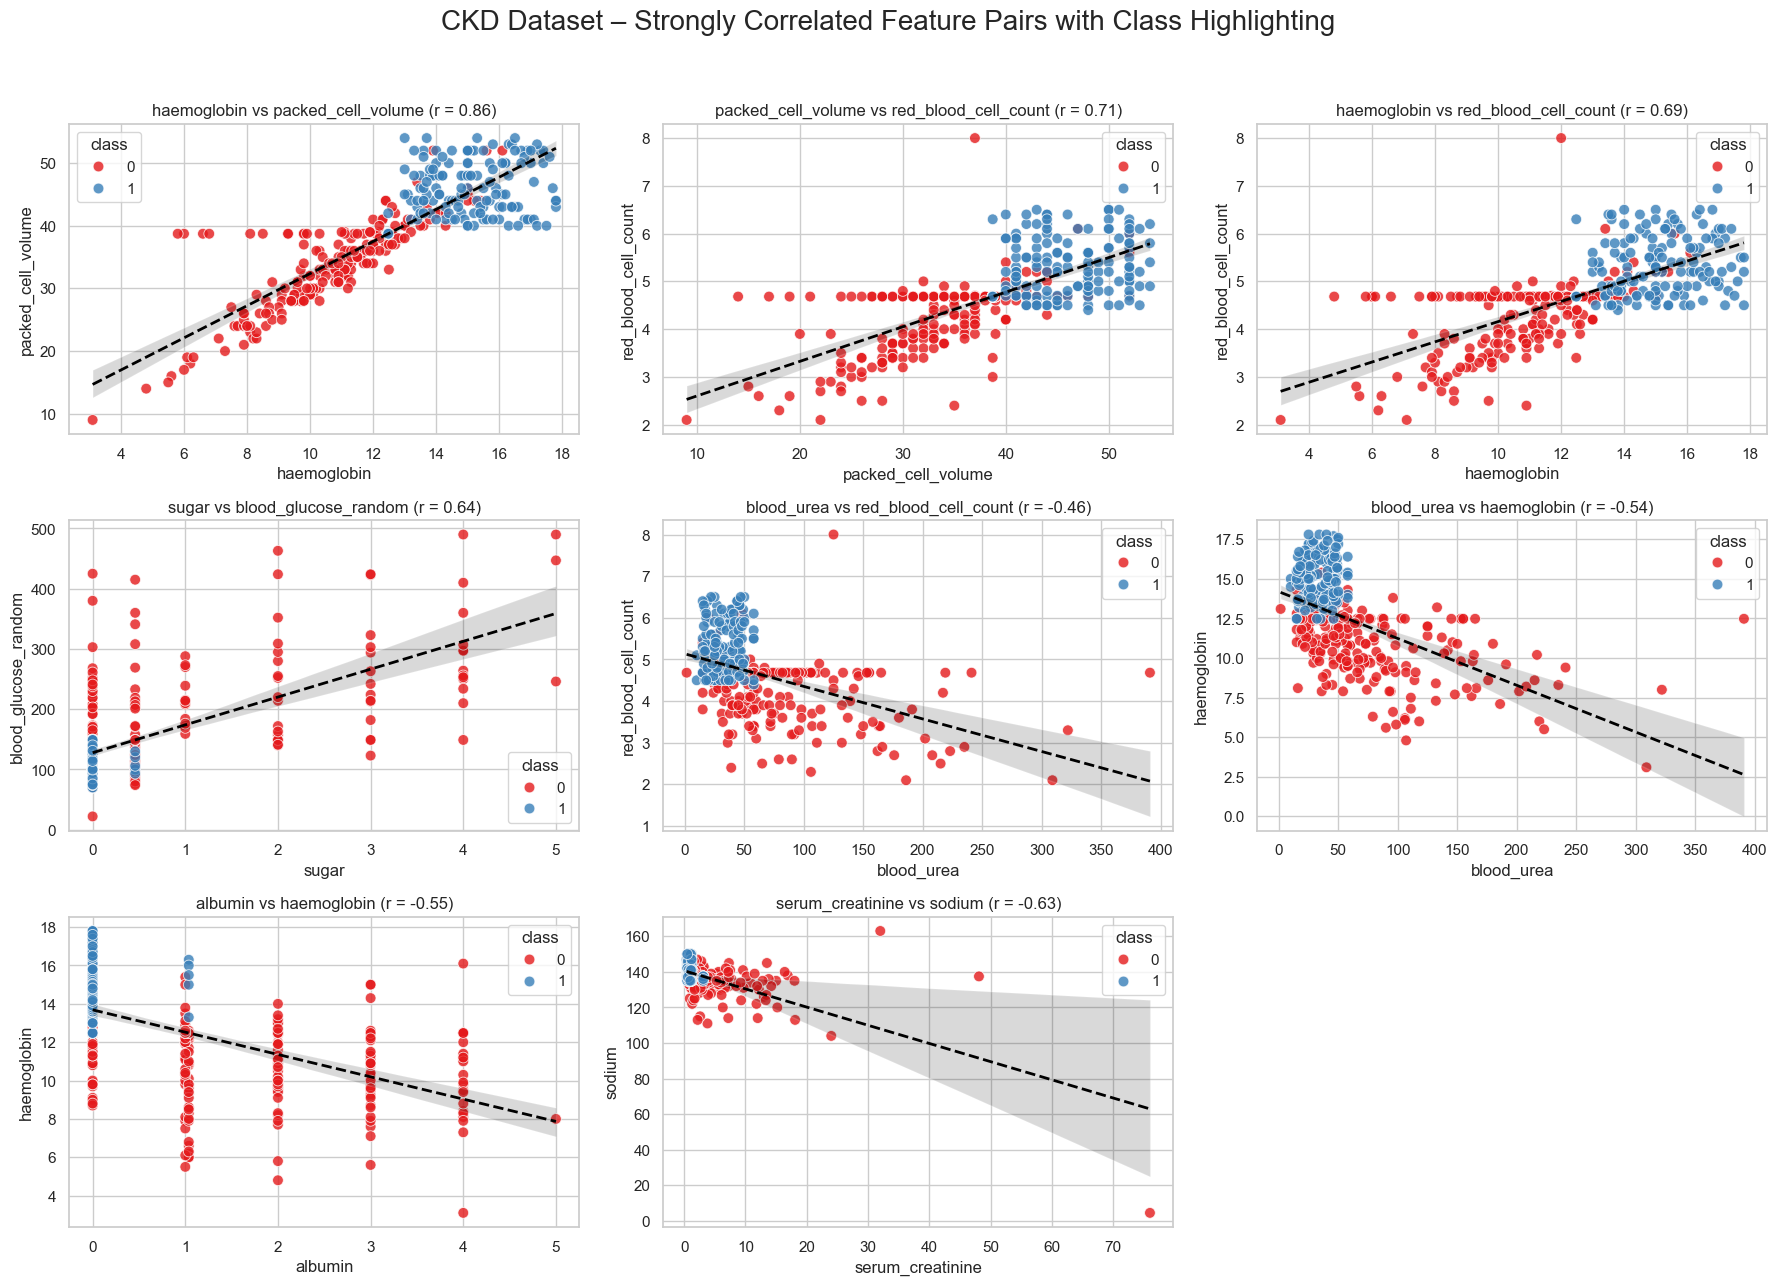

In [71]:
pairs = [
    ('haemoglobin', 'packed_cell_volume'),
    ('packed_cell_volume', 'red_blood_cell_count'),
    ('haemoglobin', 'red_blood_cell_count'),
    ('sugar', 'blood_glucose_random'),
    ('blood_urea', 'red_blood_cell_count'),
    ('blood_urea', 'haemoglobin'),
    ('albumin', 'haemoglobin'),
    ('serum_creatinine', 'sodium')
]

# Set a polished theme
sns.set_theme(style="whitegrid", palette="viridis")

# Number of plots
n = len(pairs)
rows = (n + 1) // 2

# Create subplot grid
plt.figure(figsize=(18, rows * 4))
for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(rows, 3, i)
    
    # Only plot if both columns exist and have no missing values
    if x in disease.columns and y in disease.columns:
        sns.scatterplot(data=disease, x=x, y=y, hue='class', palette='Set1', alpha=0.8, s=60)
        sns.regplot(data=disease, x=x, y=y, scatter=False, color='black', line_kws={"linewidth": 2, "linestyle": "--"})
        
        # Compute correlation for title
        corr_val = disease[[x, y]].dropna().corr().iloc[0, 1]
        plt.title(f"{x} vs {y} (r = {corr_val:.2f})", fontsize=12)
        plt.xlabel(x)
        plt.ylabel(y)

plt.suptitle('CKD Dataset – Strongly Correlated Feature Pairs with Class Highlighting', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
#EDA

features = ['red_blood_cell_count', 'packed_cell_volume', 'haemoglobin', 'albumin', 'specific_gravity']
class_palette = ({0:"red", 1:"green"})

for feature in features:
    plt.figure(figsize=(6,4))
    sns.histplot(data = disease, x = feature, hue = 'class', kde = True,  palette= class_palette)
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel(feature)
    plt.legend(title='Class', labels=['CKD (0)', 'Non-CKD (1)'])
    plt.show()
    


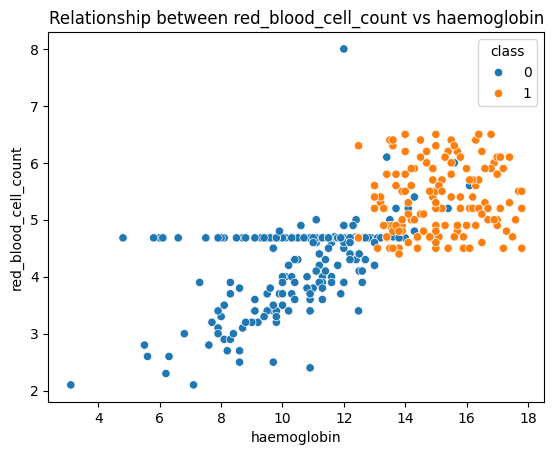

In [ ]:
##Scatter plot for relationship
plt.Figure(figsize=(6,4))
sns.scatterplot(data = disease, x = 'haemoglobin', y = 'red_blood_cell_count', hue= 'class')
plt.xlabel("haemoglobin")
plt.ylabel("red_blood_cell_count")
plt.title("Relationship between red_blood_cell_count vs haemoglobin")
plt.show()

In [42]:
# Compute full correlation matrix on numeric features
corr_matrix = disease.corr(numeric_only=True)

import numpy as np

mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
corr_pairs = corr_matrix.where(mask)

# Filter for strong correlations (> 0.6 or < -0.4)
strong_corr_pairs = corr_pairs.stack().reset_index()
strong_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
filtered = strong_corr_pairs[(strong_corr_pairs['Correlation'] > 0.6) | (strong_corr_pairs['Correlation'] < -0.4)]

# Display top results
filtered.sort_values(by='Correlation', ascending=False)


,Feature 1,Feature 2,Correlation
85,haemoglobin,packed_cell_volume,0.855779
89,packed_cell_volume,red_blood_cell_count,0.705778
87,haemoglobin,red_blood_cell_count,0.687731
46,sugar,blood_glucose_random,0.638066
45,albumin,red_blood_cell_count,-0.450666
25,specific_gravity,albumin,-0.461722
69,blood_urea,red_blood_cell_count,-0.463764
43,albumin,packed_cell_volume,-0.523515
67,blood_urea,packed_cell_volume,-0.524317
66,blood_urea,haemoglobin,-0.538915


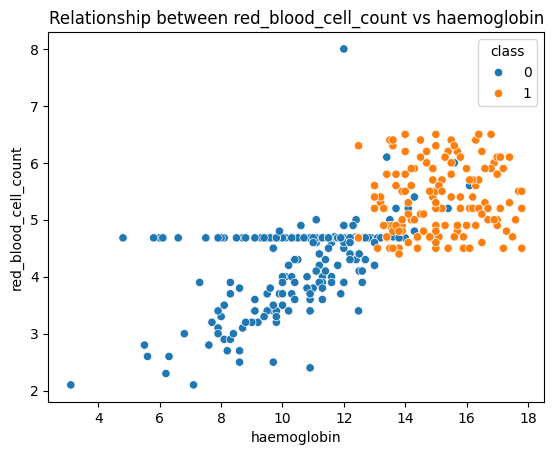

In [62]:
##Scatter plot for relationship
plt.Figure(figsize=(6,4))
sns.scatterplot(data = disease, x = 'haemoglobin', y = 'red_blood_cell_count', hue= 'class')
plt.xlabel("haemoglobin")
plt.ylabel("red_blood_cell_count")
plt.title("Relationship between red_blood_cell_count vs haemoglobin")
plt.show()

In [ ]:
##Scatter plot for relationship
plt.Figure(figsize=(6,4))
sns.scatterplot(data = disease, x = 'packed_cell_volume', y = 'red_blood_cell_count', hue= 'class')
plt.xlabel("packed volumne")
plt.ylabel("red_blood_cell_count")
plt.title("Relationship between red_blood_cell_count vs packed volumne")
plt.show()

In [ ]:
#Model Building

#The response and features
X = disease[['red_blood_cell_count', 'packed_cell_volume', 'haemoglobin', 'albumin', 'specific_gravity']]
y = disease['class']

#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

#Knn model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(f"Test Accuracy of KNN {knn_acc} ")

print(f"Confusion Matrix : {confusion_matrix(y_test, knn.predict(X_test))}")
print(f"Classification Report : {classification_report(y_test, knn.predict(X_test))}")

In [ ]:
#Decisoon Tree Classifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(f"Accuracy of Decision Tree Classifier is {dtc_acc}")

print(f"Confusion Matrix {confusion_matrix(y_test, dtc.predict(X_test))}")
print(f"Classification Report {classification_report(y_test, dtc.predict(X_test))}")

Compared with KNN the Decision Tree CLssifier works better with accuracy of 96%.

In [ ]:
disease.info()

In [ ]:
categorical_cols = [
    'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
    'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
    'appetite', 'pedal_edema', 'aanemia'
]


In [ ]:
df_encoded = pd.get_dummies(disease, columns=categorical_cols, drop_first=True)
